In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [3]:
cols_to_drop = ['contact', 'day', 'month', 'duration', 'campaign', 'previous']
df.drop(columns=cols_to_drop, inplace=True)
df.head(5)

,age,job,marital,education,balance,housing,loan,pdays,deposit
0,59,admin.,married,secondary,2343,yes,no,-1,yes
1,56,admin.,married,secondary,45,no,no,-1,yes
2,41,technician,married,secondary,1270,yes,no,-1,yes
3,55,services,married,secondary,2476,yes,no,-1,yes
4,54,admin.,married,tertiary,184,no,no,-1,yes


In [4]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,age,job,marital,education,balance,housing,loan,pdays,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,object
N_Uniq,76,12,3,4,3805,2,2,472,2


In [5]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
df[cat_cols] = df[cat_cols].astype('category')
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,age,job,marital,education,balance,housing,loan,pdays,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,object
N_Uniq,76,12,3,4,3805,2,2,472,2


In [6]:
Nulls = pd.DataFrame(df.isnull().sum()).T
# ratio = Nulls/df.shape[0]
# pd.DataFrame({"Nulls": Nulls, "Ratio(%)": ratio}).T
Nulls

,age,job,marital,education,balance,housing,loan,pdays,deposit
0,0,0,0,0,0,0,0,0,0


In [7]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

61
0


In [8]:
num_colss = df.select_dtypes(include=['number']).columns
print(num_colss.tolist())

['age', 'balance', 'pdays']


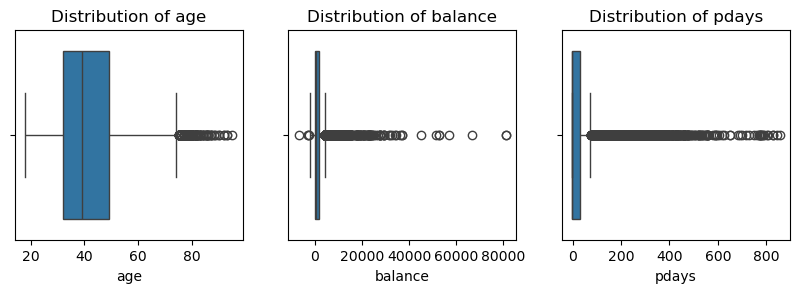

In [9]:
plt.figure(figsize=(10, 6))
for i ,col in enumerate(num_colss):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f'Distribution of {col}')
plt.show()

In [10]:
for col in num_colss:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR for {col}: {IQR}")

IQR for age: 17.0
IQR for balance: 1591.0
IQR for pdays: 30.0


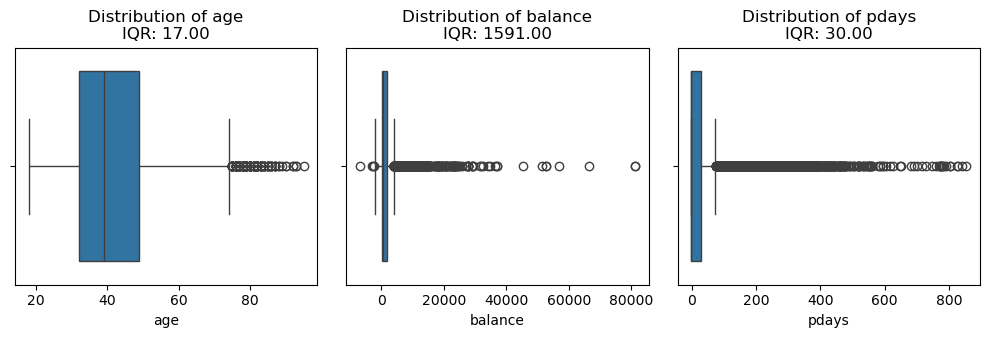

In [11]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_colss):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[col], orient='h')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    plt.title(f'Distribution of {col}\nIQR: {IQR:.2f}')
plt.tight_layout()
plt.show()

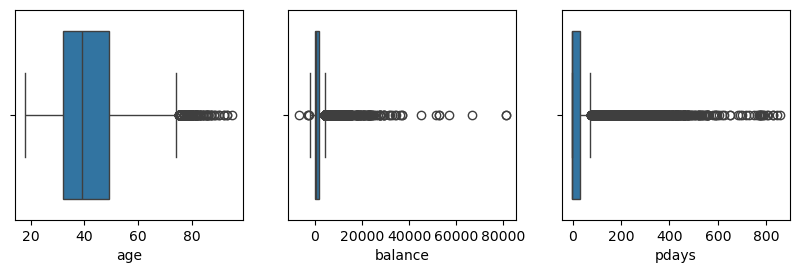

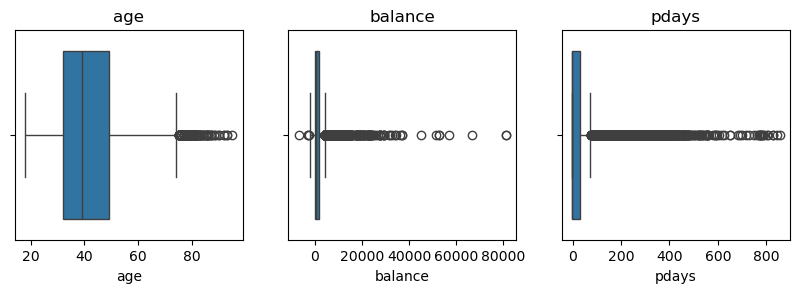

In [12]:

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_colss):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[col], orient='h')
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
lower_outliers = df[df[col] < lower_whisker][col].values
upper_outliers = df[df[col] > upper_whisker][col].values

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_colss):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient='h')

plt.show()

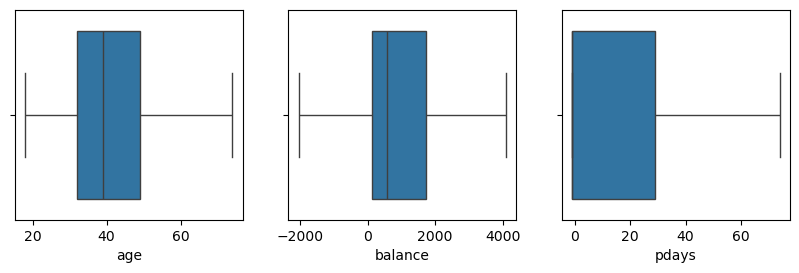

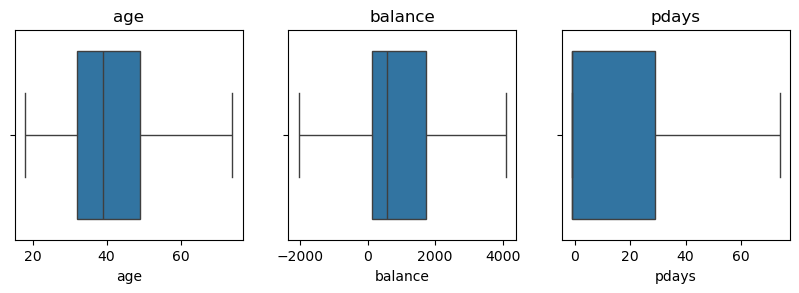

In [13]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_colss):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[col], orient='h', showfliers=False)  # هذا السطر يمنع رسم نقاط الأوتلاير

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_colss):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient='h', showfliers=False)  # منع ظهور الأوتلاير هنا أيضا

plt.show()

In [14]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [15]:
from bs4 import BeautifulSoup

In [16]:
with open('home.html','r') as html_file:
    content = html_file.read()
    print(content)


<!doctype html>
<html lang="en">
   <head>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
      <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
      <title>DEPI_R3_BNS_DS Courses</title>
      <style>
         body {
            background-color: #368be0;
         }
         .header-title {
            text-align: center;
            margin-top: 40px;
            margin-bottom: 40px;
            font-weight: bold;
            color: #01070c;
         }
         .card-deck .card {
            transition: transform 0.3s, box-shadow 0.3s;
         }
         .card-deck .card:hover {
            transform: translateY(-5px);
            box-shadow: 0 8px 20px rgba(0, 0, 0, 0.2);
         }
         .btn-custom {
            background-color: #007bff;
            border: none;
            transition: background-color 0.3s;
         }
         .btn-custom:hover {

In [17]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [18]:
with open ('home.html','r') as html_file:
    content = html_file.read()
    soup = BeautifulSoup(content,'lxml')
    print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet"/>
  <title>
   DEPI_R3_BNS_DS Courses
  </title>
  <style>
   body {
            background-color: #368be0;
         }
         .header-title {
            text-align: center;
            margin-top: 40px;
            margin-bottom: 40px;
            font-weight: bold;
            color: #01070c;
         }
         .card-deck .card {
            transition: transform 0.3s, box-shadow 0.3s;
         }
         .card-deck .card:hover {
            transform: translateY(-5px);
            box-shadow: 0 8px 20px rgba(0, 0, 0, 0.2);
         }
         .btn-custom {
            background-color: #007bff;
            border: none;
            transition: background-color 0.3s;
         }
         .btn-custom:hover {
            backg

In [19]:
with open ('home.html','r') as html_file:
    content = html_file.read()
    soup = BeautifulSoup(content,'lxml')
    courses_html_tages = soup.find_all('h5')
    for course in courses_html_tages:
        print(course.text)

Python for Beginners
Python Web Development
Python Machine Learning


In [20]:
with open ('home.html','r') as html_file:
    content = html_file.read()
    soup = BeautifulSoup(content,'lxml')
    courses_card = soup.find_all('div',class_='card')
    for course in courses_card:
        print(course.text)


Python and Web Scraping

Python for Beginners
Welcome to the DEPI DS Program. Start your journey with Python fundamentals!
Win $20



Data Science

Python Web Development
Already know Python? Learn how to build powerful web applications with it!
Win $30



Machine Learning

Python Machine Learning
Dive into AI and ML. Master data modeling and prediction using Python!
Win $100




In [21]:
with open ('home.html','r') as html_file:
    content = html_file.read()
    soup = BeautifulSoup(content,'lxml')
    courses_card = soup.find_all('div',class_='card')
    for course in courses_card:
        coures_name = course.h5.text
        course_win = course.a.text.split()[-1]
        print(f"{coures_name},win {course_win})")


Python for Beginners,win $20)
Python Web Development,win $30)
Python Machine Learning,win $100)


In [22]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [27]:
import requests
from bs4 import BeautifulSoup
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation=')
soup = BeautifulSoup(html_text.text,'lxml')
jobs = soup.find_all ('li',class_='clearfix job-bx wht-shd-bx')
print(jobs)

[<li class="clearfix job-bx wht-shd-bx">
<header class="clearfix">
<!--
-->
<!-- -->
<div class="d-flex d-flex-l-r job-title__logo">
<div class="d-flex d-flex-l-r">
<span class="logo-container">
<i class="default-company-logo"></i>
</span>
<div>
<h2 class="heading-trun" title="Python Developer">
<a href="https://www.timesjobs.com/job-detail/python-developer-o9-solutions-inc-netherlands-bengaluru-bangalore-spain-japan-dallas-3-to-6-yrs-jobid-JcLlGBUkpYRzpSvf__PLUS__uAgZw==&amp;source=srp" onclick="logViewUSBT('view','71077408','software engineering    ,   database management    ,   machine learning    ,   cloud infrastructure    ,   agile methodologies    ,  hive  ,  sql  ,  hadoop  ,  mongodb  ,  python  ,  telerik  ,  team player  ,  javascript','Netherlands,  Bengaluru / Bangalore,  Spain,  Japan,  Dallas','3 - 6','IT Software : Software Products &amp; Services','1','' )" target="_blank">
<strong class="blkclor">Python</strong> Developer</a> </h2>
<div class="d-flex d-flex-align-item

In [30]:
import requests
from bs4 import BeautifulSoup
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation=')
soup = BeautifulSoup(html_text.text,'lxml')


In [43]:
import requests
from bs4 import BeautifulSoup
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation=')
soup = BeautifulSoup(html_text.text,'lxml')
jobs = soup.find('li', class_='clearfix job-bx wht-shd-bx')
company_name  =  jobs.find('h3', class_ = 'joblist-comp-name').text.replace(" ","")
skills = jobs.find('div', class_ ='srp-skills').text.replace(" ","")
publish_date = jobs.find('span', class_='sim-posted').span.text
# print(company_name)
# print(skills)
print(publish_date)

1 day ago


In [48]:
import requests
from bs4 import BeautifulSoup
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation=')
soup = BeautifulSoup(html_text.text,'lxml')
jobs = soup.find('li', class_='clearfix job-bx wht-shd-bx')
company_name  =  jobs.find('h3', class_ = 'joblist-comp-name').text.replace(" ","")
skills = jobs.find('div', class_ ='srp-skills').text.replace(" ","")
publish_date = jobs.find('span', class_='sim-posted').span.text
print(f'''
    Company Name: {company_name}
    request skills: {skills}
    Published Date: {publish_date}
    ''')


    Company Name: 
		o9SolutionsInc.
		
		
    request skills: 



					softwareengineering
				

					databasemanagement
				

					machinelearning
				

					cloudinfrastructure
				

					agilemethodologies
				

					hive
				

					sql
				

					hadoop
				

					mongodb
				

					python
				

					telerik
				

					teamplayer
				

					javascript
				


    Published Date: 1 day ago
    


In [51]:
import requests
url = 'https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation='
rsponse = requests.get(url)
# print(f"status code: {rsponse.status_code}")
soup = BeautifulSoup(html_text.text,'lxml')
jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')
print(f"found {len(jobs)} jobs")


found 25 jobs


In [54]:
import requests
from bs4 import BeautifulSoup
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=python&txtLocation=')
soup = BeautifulSoup(html_text.text,'lxml')
jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

for job in jobs:

    company_name  =  job.find('h3', class_ = 'joblist-comp-name')
    skills = job.find('div', class_ ='srp-skills')
    publish_date = job.find('span', class_='sim-posted')
    if company_name and skills and publish_date:
        company_name = company_name.text.strip()
        skills = ', '.join (skills.text.strip() for skill in skills.text.strip().split())
        publish_date = publish_date.span.text.strip()
    print(f'''
        Company Name: {company_name}
        request skills: {skills}
        Published Date: {publish_date}
        ''')
    print("=" *30)


        Company Name: Bright Vision Technologies
        request skills: python programming
   				

   					software development
   				

   					testing and debugging
   				

   					database management
   				

   					version control
   				

   					css
   				

   					sql
   				

   					git
   				

   					html
   				

   					software engineering
   				

   					javascript
   				

   					django
   				

   					web technologies
   				

   					it professional, python programming
   				

   					software development
   				

   					testing and debugging
   				

   					database management
   				

   					version control
   				

   					css
   				

   					sql
   				

   					git
   				

   					html
   				

   					software engineering
   				

   					javascript
   				

   					django
   				

   					web technologies
   				

   					it professional, python programming
   				

   					software development
   				

   					testing and debugging
   				

   